In [0]:
%pip install openimages ultralytics


  Obtaining dependency information for openimages from https://files.pythonhosted.org/packages/49/ba/587944c183999aa9a0416d6979739b78adfe021eee74aa9db78f0beaea06/openimages-0.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/d0/a3/87a9d3c9d1e873d922409d18faa2a77c18e3f7a32757fdaca16bb7a889f3/ultralytics-8.3.49-py3-none-any.whl.metadata
  Obtaining dependency information for cvdata from https://files.pythonhosted.org/packages/7c/33/ad3499f2cfbd21205417942ccd5565427b35cabbbf63670a7346e7013e7e/cvdata-0.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/3f/a4/d2537f47fd7fcfba966bd806e3ec18e7ee1681056d4b0a9c8d983983e4d5/opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ultralytics-thop>=2.0.0 from https://files.pythonhosted.org/packages/4a/87/bfd5285f27

In [0]:
dbutils.library.restartPython()

In [0]:
import os
import time
import matplotlib as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm, tqdm_notebook
from src.dataset_loaders.download_openimages import OpenImagesLoader
import torch.distributed as dist
import logging

logger = spark._jvm.org.apache.log4j
logging.getLogger("py4j").setLevel(logging.ERROR)

In [0]:
# Device Configuration:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Device being used: {device}")

Device being used: cuda


## Food 101 Experiment


In [0]:
# import os

# ROBOFLOW_API_KEY = os.environ.get("ROBOFLOW_API_KEY")

# from roboflow import Roboflow
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)
# project = rf.workspace("food101-capstone").project("food-101-du1wm")
# version = project.version(1)
# dataset = version.download("yolov11", "./data/food101")

loading Roboflow workspace...
loading Roboflow project...


In [0]:
# from ultralytics import YOLO

# yolo = YOLO('yolo11n.pt')
# yolo.train(data='data/food101/data.yaml', epochs=10, batch=16, device=device, augment=False)
# valid_results = yolo.val()
# print(valid_results)

Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data/food101/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

train: Scanning /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/food101/train/labels.cache... 379 images, 3 backgrounds, 0 corrupt: 100%|██████████| 379/379 [00:00<?, ?it/s]
val: Scanning /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/food101/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9238      4.497       1.66         11        640: 100%|██████████| 24/24 [02:35<00:00,  6.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.63s/it]

                   all         63         64     0.0163       0.75      0.152     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7262      3.977      1.524         11        640: 100%|██████████| 24/24 [02:32<00:00,  6.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.41s/it]

                   all         63         64     0.0155      0.812      0.165     0.0906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7203      3.686      1.485         11        640: 100%|██████████| 24/24 [02:32<00:00,  6.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.40s/it]

                   all         63         64      0.872     0.0594      0.292      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.7481      3.389      1.553         12        640: 100%|██████████| 24/24 [02:34<00:00,  6.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.31s/it]

                   all         63         64      0.425      0.326      0.351      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.7563       3.11      1.548         15        640: 100%|██████████| 24/24 [02:31<00:00,  6.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.26s/it]

                   all         63         64      0.578      0.383      0.383      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6907      2.885       1.49         11        640: 100%|██████████| 24/24 [02:32<00:00,  6.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.14s/it]

                   all         63         64       0.31      0.445      0.407      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.6649      2.713      1.455         12        640: 100%|██████████| 24/24 [02:31<00:00,  6.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.43s/it]

                   all         63         64      0.365      0.429      0.418      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.6346      2.539      1.419         11        640: 100%|██████████| 24/24 [02:34<00:00,  6.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.64s/it]

                   all         63         64      0.457      0.476      0.489      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5984      2.356      1.362         11        640: 100%|██████████| 24/24 [02:33<00:00,  6.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.45s/it]

                   all         63         64      0.443      0.544      0.538      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5364      2.269      1.291         11        640: 100%|██████████| 24/24 [02:38<00:00,  6.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]

                   all         63         64      0.515      0.487      0.591       0.46



10 epochs completed in 0.459 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1 CPU (Apple M1 Pro)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.32s/it]


                   all         63         64      0.515      0.486      0.591       0.46
        chocolate_cake         14         14          1      0.751      0.986      0.833
          french_fries         11         11      0.765      0.545      0.808      0.609
             ice_cream          2          2          0          0     0.0124    0.00468
                nachos          7          7      0.305      0.571      0.513      0.402
           onion_rings         12         12      0.563      0.647      0.799      0.665
                 pizza         10         10      0.902        0.8      0.874      0.801
                 tacos          7          7      0.587      0.571      0.628      0.357
               waffles          1          1          0          0      0.111     0.0114
Speed: 0.5ms preprocess, 159.7ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train3
Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1 CPU (Apple M1 Pro)
YOLO11n summ

val: Scanning /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/food101/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.75s/it]


                   all         63         64      0.515      0.486      0.591       0.46
        chocolate_cake         14         14          1      0.751      0.986      0.833
          french_fries         11         11      0.765      0.545      0.808      0.609
             ice_cream          2          2          0          0     0.0124    0.00468
                nachos          7          7      0.305      0.571      0.513      0.402
           onion_rings         12         12      0.563      0.647      0.799      0.665
                 pizza         10         10      0.902        0.8      0.874      0.801
                 tacos          7          7      0.587      0.571      0.628      0.357
               waffles          1          1          0          0      0.111     0.0114
Speed: 0.7ms preprocess, 165.6ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: 

In [0]:
# dir = "data/food101/valid/images"
# img_list = []
# for file in os.listdir(dir):
#     f = os.path.join(dir, file)
#     if os.path.isfile(f):
#         img_list.append(f)

# yolo.predict(img_list, save=True)

0: 640x640 1 nachos, 1 pizza, 128.4ms
1: 640x640 1 onion_rings, 128.4ms
2: 640x640 (no detections), 128.4ms
3: 640x640 (no detections), 128.4ms
4: 640x640 (no detections), 128.4ms
5: 640x640 1 onion_rings, 128.4ms
6: 640x640 1 french_fries, 128.4ms
7: 640x640 1 french_fries, 128.4ms
8: 640x640 1 samosa, 128.4ms
9: 640x640 1 french_fries, 128.4ms
10: 640x640 1 nachos, 1 waffles, 128.4ms
11: 640x640 1 nachos, 1 samosa, 1 waffles, 128.4ms
12: 640x640 1 tacos, 128.4ms
13: 640x640 1 french_fries, 128.4ms
14: 640x640 1 strawberry_shortcake, 128.4ms
15: 640x640 1 french_fries, 128.4ms
16: 640x640 2 chocolate_cakes, 128.4ms
17: 640x640 1 chocolate_cake, 128.4ms
18: 640x640 1 onion_rings, 128.4ms
19: 640x640 1 chocolate_cake, 128.4ms
20: 640x640 1 nachos, 1 pizza, 128.4ms
21: 640x640 1 onion_rings, 128.4ms
22: 640x640 1 onion_rings, 128.4ms
23: 640x640 1 chocolate_cake, 128.4ms
24: 640x640 1 pizza, 128.4ms
25: 640x640 1 onion_rings, 1 samosa, 128.4ms
26: 640x640 (no detections), 128.4ms
27: 640

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'chocolate_cake', 1: 'french_fries', 2: 'ice_cream', 3: 'nachos', 4: 'onion_rings', 5: 'pizza', 6: 'samosa', 7: 'strawberry_shortcake', 8: 'tacos', 9: 'waffles'}
 obb: None
 orig_img: array([[[ 59,  54,  53],
         [ 53,  48,  47],
         [ 52,  47,  46],
         ...,
         [ 37,  39,  40],
         [ 37,  39,  40],
         [ 39,  41,  42]],
 
        [[ 55,  50,  49],
         [ 51,  46,  45],
         [ 52,  47,  46],
         ...,
         [ 30,  32,  33],
         [ 30,  32,  33],
         [ 31,  33,  34]],
 
        [[ 62,  58,  57],
         [ 59,  55,  54],
         [ 58,  54,  53],
         ...,
         [ 21,  23,  24],
         [ 20,  22,  23],
         [ 21,  23,  24]],
 
        ...,
 
        [[176, 193, 196],
         [176, 193, 196],
         [177, 194, 197],
         ...,
         [153, 159, 154],
         [153

## Fruits-360 Experiment


In [0]:
import os
import shutil
import re
import json

parent_folder = "data/fruits-360"
img_folder = "data/fruits-360/images"

# Dictionary to store the mappings
file_mapping = {}


def format_subfolder_name(subfolder_name):
    """
    Formats the subfolder name: removes numbers and converts spaces to underscores.
    """
    name_without_number = re.sub(r"\d+$", "", subfolder_name).strip()
    formatted_name = name_without_number.lower().replace(" ", "_")
    return name_without_number, formatted_name


def move_images_to_parent_folder(parent_folder, img_folder, folder_name, new_folder_name):
    folder = os.path.join(parent_folder, folder_name)
    img_folder = os.path.join(img_folder, new_folder_name)
    os.makedirs(img_folder, exist_ok=True)
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)

        if os.path.isdir(subfolder_path):
            name_without_number, formatted_subfolder_name = format_subfolder_name(subfolder)

            for file in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, file)
                if os.path.isfile(file_path) and file.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
                    new_filename = f"{formatted_subfolder_name}_{file}"
                    new_file_path = os.path.join(img_folder, new_filename)

                    shutil.move(file_path, new_file_path)

                    file_mapping[new_filename] = name_without_number

            os.rmdir(subfolder_path)

    with open(f"./file_mapping_{new_folder_name}.json", "w") as f:
        json.dump(file_mapping, f, indent=4)

    print(f"All images from {folder} have been moved and renamed.")


move_images_to_parent_folder(parent_folder, img_folder, "Training", "train")
move_images_to_parent_folder(parent_folder, img_folder, "Test", "test")

All images from data/fruits-360/Training have been moved and renamed.
All images from data/fruits-360/Test have been moved and renamed.


In [0]:
import random


def split_dataset(images_folder, train_folder, val_folder, val_ratio=0.2):
    """
    Split a dataset into training and validation subsets.

    Args:
        images_folder (str): Path to the folder containing all images.
        train_folder (str): Path to save the training subset.
        val_folder (str): Path to save the validation subset.
        val_ratio (float): Ratio of images to allocate for validation.
    """

    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    images = [f for f in os.listdir(images_folder) if f.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff"))]

    random.shuffle(images)

    val_count = int(len(images) * val_ratio)

    val_images = images[:val_count]
    train_images = images[val_count:]

    for img in train_images:
        shutil.move(os.path.join(images_folder, img), os.path.join(train_folder, img))

    for img in val_images:
        shutil.move(os.path.join(images_folder, img), os.path.join(val_folder, img))

    print(f"Dataset split complete. Training: {len(train_images)}, Validation: {len(val_images)}")


original_training_folder = "data/fruits-360/images/train"
train_folder = "data/fruits-360/images/train"
val_folder = "data/fruits-360/images/val"

split_dataset(original_training_folder, train_folder, val_folder, val_ratio=0.2)

Dataset split complete. Training: 50235, Validation: 12558


In [0]:
import json
import yaml


def create_master_class_list(mapping_file):
    """
    Create a master list of classes from the JSON mapping file.
    """
    # Load the mapping from JSON
    with open(mapping_file, "r") as f:
        file_mapping = json.load(f)

    # Extract unique class names
    unique_classes = sorted(set(file_mapping.values()))

    # Create a mapping of class names to class IDs
    class_id_mapping = {class_name: idx for idx, class_name in enumerate(unique_classes)}

    print(f"Classes found: {unique_classes}")
    return unique_classes, class_id_mapping


def create_annotation_files(mapping_file, class_id_mapping, images_folder, labels_folder, train_test):
    """
    Create YOLO annotation files for each image based on the JSON mapping,
    only if the image exists in the images folder.
    """
    labels_folder = os.path.join(labels_folder, train_test)
    images_folder = os.path.join(images_folder, train_test)
    os.makedirs(labels_folder, exist_ok=True)

    # Load the mapping from JSON
    with open(mapping_file, "r") as f:
        file_mapping = json.load(f)

    # Get a list of images in the images folder
    existing_images = set(os.listdir(images_folder))

    for image_filename, class_name in file_mapping.items():
        if image_filename in existing_images:
            class_id = class_id_mapping[class_name]

            annotation_content = f"{class_id} 0.5 0.5 1.0 1.0\n"  # Whole image bounding box

            annotation_filename = os.path.splitext(image_filename)[0] + ".txt"
            annotation_path = os.path.join(labels_folder, annotation_filename)

            with open(annotation_path, "w") as f:
                f.write(annotation_content)

    print(f"Annotation files created in '{labels_folder}'.")


def create_yaml_file(classes_list, yaml_output_path):
    """
    Create a YAML file for YOLO with class names and dataset configuration.
    """
    cwd = os.getcwd()

    yaml_data = {
        "train": os.path.join(cwd, "images/train"),
        "val": os.path.join(cwd, "images/val"),
        "test": os.path.join(cwd, "images/test"),
        "nc": len(classes_list),
        "names": classes_list,
    }

    with open(yaml_output_path, "w") as f:
        yaml.dump(yaml_data, f)

    print(f"YAML file saved to '{yaml_output_path}'.")


train_mapping_file = "./file_mapping_train.json"
test_mapping_file = "./file_mapping_train.json"
images_folder = "data/fruits-360/images"  # Folder containing the images
labels_folder = "data/fruits-360/labels"  # Folder where annotations will be saved
yaml_output_path = "data/fruits-360/data.yaml"  # Path for the YOLO YAML configuration file

train_classes_list, train_class_id_mapping = create_master_class_list(train_mapping_file)
test_classes_list, test_class_id_mapping = create_master_class_list(test_mapping_file)

create_annotation_files(train_mapping_file, train_class_id_mapping, images_folder, labels_folder, "train")
create_annotation_files(train_mapping_file, train_class_id_mapping, images_folder, labels_folder, "val")
create_annotation_files(test_mapping_file, test_class_id_mapping, images_folder, labels_folder, "test")

create_yaml_file(train_classes_list, yaml_output_path)

Classes found: ['Apple', 'Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red', 'Apple Red Delicious', 'Apple Red Yellow', 'Apple hit', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cabbage white', 'Cactus fruit', 'Cantaloupe', 'Carambula', 'Carrot', 'Cauliflower', 'Cherry', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber', 'Cucumber Ripe', 'Dates', 'Eggplant', 'Eggplant long', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'On

In [0]:
from ultralytics import YOLO

yolo = YOLO("yolo11n.pt")
yolo.train(data="data/fruits-360/data.yaml", epochs=10, batch=16, device=device, augment=False)
valid_results = yolo.val()
print(valid_results)

Ultralytics 8.3.40 🚀 Python-3.11.10 torch-2.5.1 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data/fruits-360/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/fruits-360/labels/train... 50235 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50235/50235 [00:18<00:00, 2697.77it/s]


train: New cache created: /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/fruits-360/labels/train.cache


val: Scanning /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/fruits-360/labels/val... 12558 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12558/12558 [00:04<00:00, 2880.89it/s]


val: New cache created: /Users/peter.park/Documents/_Personal/Education/OMSCS/CS7643/Convolutionalists/FoodforDeepThought/data/fruits-360/labels/val.cache
Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=8e-05, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.909        6.4      2.549         16        640:   2%|▏         | 51/3140 [06:30<6:34:33,  7.66s/it]


---------------------------------------------------------------------------
KeyboardInterrupt                         Traceback (most recent call last)
Cell In[22], line 4
      1 from ultralytics import YOLO
      3 yolo = YOLO('yolo11n.pt')
----> 4 yolo.train(data='data/fruits-360/data.yaml', epochs=10, batch=16, device='cpu', augment=False)
      5 valid_results = yolo.val()
      6 print(valid_results)

File ~/miniconda3/envs/convolutionalists/lib/python3.11/site-packages/ultralytics/engine/model.py:805, in Model.train(self, trainer, **kwargs)
    802     self.model = self.trainer.model
    804 self.trainer.hub_session = self.session  # attach optional HUB session
--> 805 self.trainer.train()
    806 # Update model and cfg after training
    807 if RANK in {-1, 0}:

File ~/miniconda3/envs/convolutionalists/lib/python3.11/site-packages/ultralytics/engine/trainer.py:207, in BaseTrainer.train(self)
    204         ddp_cleanup(self, str(file))
    206 else:
--> 207     self._do_train(w

## Open Images Dataset


In [0]:
from src.dataset_loaders.download_openimages import OpenImagesLoader

openimages = OpenImagesLoader(annotation_format="darknet")

In [0]:
openimages.download_data(batch_download=True)

Attempting to download the Open Images dataset


2024-12-10  16:48:38 INFO Downloading 43 train images for class 'hot dog'
100%|██████████| 43/43 [00:01<00:00, 25.29it/s]
2024-12-10  16:48:40 INFO Creating 43 train annotations (darknet) for class 'hot dog'
100%|██████████| 43/43 [00:00<00:00, 550.21it/s]
2024-12-10  16:48:41 INFO Downloading 70 train images for class 'french fries'
100%|██████████| 70/70 [00:02<00:00, 30.46it/s]
2024-12-10  16:48:43 INFO Creating 70 train annotations (darknet) for class 'french fries'
100%|██████████| 70/70 [00:00<00:00, 3644.78it/s]
2024-12-10  16:48:43 INFO Downloading 69 train images for class 'waffle'
100%|██████████| 69/69 [00:02<00:00, 30.42it/s]
2024-12-10  16:48:45 INFO Creating 69 train annotations (darknet) for class 'waffle'
100%|██████████| 69/69 [00:00<00:00, 2497.47it/s]
2024-12-10  16:48:46 INFO Downloading 68 train images for class 'pancake'
100%|██████████| 68/68 [00:02<00:00, 30.33it/s]
2024-12-10  16:48:48 INFO Creating 68 train annotations (darknet) for class 'pancake'
100%|██████

In [0]:
openimages.split_data(keep_class_dirs=False)

Splitting data for class Hot dog
Splitting data for class French fries
Splitting data for class Waffle
Splitting data for class Pancake
Splitting data for class Burrito
Splitting data for class Pretzel
Splitting data for class Popcorn
Splitting data for class Cookie
Splitting data for class Muffin
Splitting data for class Ice cream
Splitting data for class Cake
Splitting data for class Candy
Splitting data for class Guacamole
Splitting data for class Apple
Splitting data for class Grape
Splitting data for class Common fig
Splitting data for class Pear
Splitting data for class Strawberry
Splitting data for class Tomato
Splitting data for class Lemon
Splitting data for class Banana
Splitting data for class Orange
Splitting data for class Peach
Splitting data for class Mango
Splitting data for class Pineapple
Splitting data for class Grapefruit
Splitting data for class Pomegranate
Splitting data for class Watermelon
Splitting data for class Cantaloupe
Splitting data for class Egg (Food)
S

In [0]:
openimages.create_yaml_from_file()

YAML file saved to '/tmp/openimage/openimages/data.yaml'.


In [0]:
import os

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [0]:
from ultralytics import YOLO

if not dist.is_initialized():
    dist.init_process_group("nccl")

yolo = YOLO("yolo11n.pt")
result = yolo.train(
    data="data/openimages/data.yaml", epochs=50, batch=32, device=device, augment=False, project="run/yolo-openimages"
)
valid_results = yolo.val()
print(valid_results)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)


100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]


Overriding model.yaml nc=80 with nc=64


2024-12-10  01:16:12 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


Transferred 442/499 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir /tmp/yolo-openimages/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /tmp/openimage/openimages/train/labels... 10748 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10748/10748 [00:06<00:00, 1639.90it/s]

train: WARNING ⚠️ /tmp/openimage/openimages/train/images/50e2f59fe631ef20.jpg: 1 duplicate labels removed


train: New cache created: /tmp/openimage/openimages/train/labels.cache


val: Scanning /tmp/openimage/openimages/val/labels... 1363 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1363/1363 [00:00<00:00, 1475.63it/s]


val: New cache created: /tmp/openimage/openimages/val/labels.cache


2024-12-10  01:16:31 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


Plotting labels to /tmp/yolo-openimages/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000147, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2024/12/10 01:16:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/10 01:16:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/12/10 01:16:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/12/10 01:16:34 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/12/10 01:16:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2024/12/10 01:16:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


MLflow: logging run_id(13eb6bdd6e1d4867966ad06bea9c7509) to databricks
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /tmp/yolo-openimages/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

       1/50      7.02G      1.347       4.98      1.522         87        640: 100%|██████████| 336/336 [02:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.49it/s]


                   all       1363       2542       0.39     0.0472     0.0158     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.12G    

*** WARNING: max output size exceeded, skipping output. ***

       2/50      7.12G      1.181      4.269      1.358         89        640: 100%|██████████| 336/336 [02:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.42it/s]


                   all       1363       2542       0.52     0.0824     0.0528     0.0404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       3/50      7.01G      1.147      3.696      1.336        125        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.42it/s]


                   all       1363       2542      0.525      0.113     0.0822     0.0604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.24G    

*** WARNING: max output size exceeded, skipping output. ***

       4/50      7.24G      1.118      3.338      1.314         99        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]


                   all       1363       2542      0.621      0.137      0.129     0.0911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.08G    

*** WARNING: max output size exceeded, skipping output. ***

       5/50      7.08G      1.077      3.067      1.289         80        640: 100%|██████████| 336/336 [01:52<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]


                   all       1363       2542      0.482      0.197      0.156      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.11G    

*** WARNING: max output size exceeded, skipping output. ***

       6/50      7.11G      1.055      2.852      1.269        280        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]


                   all       1363       2542      0.451      0.228      0.199      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       7/50      7.01G      1.045      2.689      1.257         76        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.40it/s]


                   all       1363       2542      0.382       0.28      0.217      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       8/50      7.01G      1.025      2.573      1.247        122        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:11<00:00,  1.95it/s]


                   all       1363       2542      0.478      0.294      0.257      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

       9/50      7.03G      1.027      2.447      1.238        110        640: 100%|██████████| 336/336 [01:56<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]


                   all       1363       2542      0.453      0.316      0.265      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.13G    

*** WARNING: max output size exceeded, skipping output. ***

      10/50      7.13G      1.005      2.338       1.23         89        640: 100%|██████████| 336/336 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]


                   all       1363       2542      0.509        0.3      0.276       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G    

*** WARNING: max output size exceeded, skipping output. ***

      11/50      6.95G     0.9937      2.264      1.224         77        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.28it/s]


                   all       1363       2542      0.488      0.341      0.288      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      12/50      7.01G     0.9819       2.17      1.213        216        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]


                   all       1363       2542       0.52      0.337      0.318      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      13/50      7.02G     0.9775      2.094        1.2        186        640: 100%|██████████| 336/336 [01:55<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.37it/s]


                   all       1363       2542      0.499      0.336      0.322      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

      14/50      7.03G     0.9661       2.04        1.2        115        640: 100%|██████████| 336/336 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.511       0.33      0.317       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.98G    

*** WARNING: max output size exceeded, skipping output. ***

      15/50      6.98G     0.9626      1.976      1.197         86        640: 100%|██████████| 336/336 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.43it/s]


                   all       1363       2542      0.503      0.368      0.344      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         7G    

*** WARNING: max output size exceeded, skipping output. ***

      16/50         7G     0.9604      1.934      1.195         60        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.04it/s]


                   all       1363       2542      0.512      0.364       0.34      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      17/50      6.97G     0.9615      1.875      1.186        109        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.48it/s]


                   all       1363       2542      0.486      0.381      0.368      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      18/50      7.01G     0.9347      1.814      1.178         95        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]


                   all       1363       2542      0.456      0.395      0.364      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.09G    

*** WARNING: max output size exceeded, skipping output. ***

      19/50      7.09G     0.9448      1.804      1.185        102        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.57it/s]


                   all       1363       2542      0.407      0.418      0.374       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      20/50      7.07G     0.9443      1.747      1.174        121        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.401      0.395      0.367      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      21/50      7.02G     0.9268      1.736      1.171         95        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.26it/s]


                   all       1363       2542      0.469        0.4      0.379      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       7.1G    

*** WARNING: max output size exceeded, skipping output. ***

      22/50       7.1G     0.9363      1.677      1.171         84        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.36it/s]


                   all       1363       2542      0.447      0.432      0.393      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

      23/50      7.03G     0.9199      1.647      1.162        108        640: 100%|██████████| 336/336 [01:54<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]


                   all       1363       2542      0.487       0.39       0.39      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      24/50      7.02G     0.9176      1.621      1.162         93        640: 100%|██████████| 336/336 [01:53<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.58it/s]


                   all       1363       2542      0.409      0.417      0.375       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.18G    

*** WARNING: max output size exceeded, skipping output. ***

      25/50      7.18G     0.9134      1.584      1.159         93        640: 100%|██████████| 336/336 [01:53<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]


                   all       1363       2542      0.442      0.411       0.38      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.06G    

*** WARNING: max output size exceeded, skipping output. ***

      26/50      7.06G     0.9074      1.556      1.159         68        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]


                   all       1363       2542      0.429      0.425      0.396      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      27/50      7.01G     0.9082      1.538      1.157        119        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all       1363       2542      0.413      0.438      0.391      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      28/50      7.01G     0.9052      1.499      1.153         92        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.58it/s]


                   all       1363       2542      0.431      0.414      0.385      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.97G    

*** WARNING: max output size exceeded, skipping output. ***

      29/50      6.97G     0.8944      1.498      1.149         90        640: 100%|██████████| 336/336 [01:58<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.43it/s]


                   all       1363       2542      0.469       0.43      0.398      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       7.6G    

*** WARNING: max output size exceeded, skipping output. ***

      30/50       7.6G     0.8908       1.46      1.141         83        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]

                   all       1363       2542      0.426      0.436      0.392      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      31/50      7.02G     0.8952      1.455      1.141        113        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.54it/s]


                   all       1363       2542      0.365       0.47      0.389      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.05G    

*** WARNING: max output size exceeded, skipping output. ***

      32/50      7.05G     0.8821      1.421      1.135         91        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.58it/s]


                   all       1363       2542      0.438      0.427      0.398      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.17G    

*** WARNING: max output size exceeded, skipping output. ***

      33/50      7.17G      0.882      1.374      1.134        107        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.58it/s]


                   all       1363       2542       0.42      0.445      0.397      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      34/50      7.07G     0.8735      1.375      1.132         82        640: 100%|██████████| 336/336 [01:54<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.61it/s]


                   all       1363       2542      0.411      0.478      0.408      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      35/50      7.07G     0.8689      1.369      1.128         67        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]


                   all       1363       2542      0.416      0.459        0.4       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.58G    

*** WARNING: max output size exceeded, skipping output. ***

      36/50      7.58G     0.8756      1.345      1.131        110        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]


                   all       1363       2542      0.424      0.474      0.408       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      37/50      7.01G     0.8744      1.352      1.135        126        640: 100%|██████████| 336/336 [01:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.36it/s]


                   all       1363       2542      0.378      0.478      0.404      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.09G    

*** WARNING: max output size exceeded, skipping output. ***

      38/50      7.09G     0.8635      1.312      1.125        107        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.35it/s]


                   all       1363       2542      0.422      0.461      0.406       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.24G    

*** WARNING: max output size exceeded, skipping output. ***

      39/50      7.24G      0.864      1.305      1.128        102        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]


                   all       1363       2542      0.434      0.441      0.402      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      40/50      7.01G     0.8597      1.278      1.121         90        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]


                   all       1363       2542      0.444      0.429        0.4      0.312
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      41/50      6.96G      0.823      1.189        1.1         32        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 1/22 [00:00<00:10,  1.94it/s]2024-12-10  02:42:36 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/

                   all       1363       2542      0.449      0.414      0.386      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      42/50      6.96G     0.8017      1.092      1.084         32        640: 100%|██████████| 336/336 [01:51<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]


                   all       1363       2542       0.44      0.421      0.396      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.99G    

*** WARNING: max output size exceeded, skipping output. ***

      43/50      6.99G     0.7968      1.072      1.081         61        640: 100%|██████████| 336/336 [01:51<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]


                   all       1363       2542      0.441      0.427      0.399      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      44/50      6.96G      0.789      1.046      1.077         79        640: 100%|██████████| 336/336 [01:50<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.62it/s]


                   all       1363       2542      0.436      0.422      0.398      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      45/50      7.02G     0.7868      1.031      1.072         57        640: 100%|██████████| 336/336 [01:52<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]


                   all       1363       2542       0.49      0.403      0.401      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.97G    

*** WARNING: max output size exceeded, skipping output. ***

      46/50      6.97G     0.7786      1.007      1.065         41        640: 100%|██████████| 336/336 [01:51<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]


                   all       1363       2542      0.478      0.399      0.399      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      47/50      6.96G     0.7737     0.9892      1.063         34        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]


                   all       1363       2542      0.501      0.405      0.403      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         7G    

*** WARNING: max output size exceeded, skipping output. ***

      48/50         7G     0.7713     0.9829      1.064         49        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]


                   all       1363       2542      0.395      0.441      0.402      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.94G    

*** WARNING: max output size exceeded, skipping output. ***

      49/50      6.94G     0.7727     0.9737      1.065         54        640: 100%|██████████| 336/336 [01:51<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all       1363       2542      0.468      0.423      0.406      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.09G    

*** WARNING: max output size exceeded, skipping output. ***

      50/50      7.09G      0.768     0.9508      1.059         51        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.447      0.422      0.405      0.316

50 epochs completed in 1.742 hours.
Optimizer stripped from /tmp/yolo-openimages/train/weights/last.pt, 5.5MB
Optimizer stripped from /tmp/yolo-openimages/train/weights/best.pt, 5.5MB

Validating /tmp/yolo-openimages/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)
YOLO11n summary (fused): 238 layers, 2,609,800 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.62it/s]


                   all       1363       2542      0.424      0.473      0.408       0.32
               hot dog          7          7      0.483      0.804       0.65      0.623
          french fries         14         24      0.355       0.25      0.148      0.103
                waffle          9         10      0.431        0.5      0.411      0.391
               pancake         11         13      0.253      0.462      0.325      0.213
               burrito          8         11      0.363      0.364      0.314       0.24
               pretzel          8          8      0.507       0.75      0.767      0.693
               popcorn          5          5      0.892          1      0.995      0.925
                cookie         50        220        0.6      0.771      0.741      0.599
                muffin         50        105      0.467      0.524      0.387      0.322
             ice cream         50         73      0.464      0.452      0.407      0.231
                  cak

Uploading artifacts:   0%|          | 0/2 [00:00<?, ?it/s]

2024/12/10 03:01:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run train at: e2-demo-field-eng.cloud.databricks.com/ml/experiments/3280716146270458/runs/13eb6bdd6e1d4867966ad06bea9c7509.
2024/12/10 03:01:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: e2-demo-field-eng.cloud.databricks.com/ml/experiments/3280716146270458.


MLflow: results logged to databricks
MLflow: disable with 'yolo settings mlflow=False'
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)
YOLO11n summary (fused): 238 layers, 2,609,800 parameters, 0 gradients, 7.4 GFLOPs


val: Scanning /tmp/openimage/openimages/val/labels.cache... 1363 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1363/1363 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:16<00:00,  2.61it/s]


                   all       1363       2542      0.405      0.474      0.405      0.317
               hot dog          7          7      0.482        0.8       0.65      0.624
          french fries         14         24      0.356       0.25      0.157      0.114
                waffle          9         10      0.429        0.5      0.411      0.386
               pancake         11         13      0.231      0.462      0.326      0.216
               burrito          8         11      0.362      0.364      0.299      0.226
               pretzel          8          8      0.507       0.75      0.724      0.682
               popcorn          5          5      0.826          1      0.995        0.9
                cookie         50        220      0.598      0.768      0.742      0.603
                muffin         50        105      0.467      0.524        0.4      0.334
             ice cream         50         73      0.464      0.466      0.398      0.235
                  cak

2024-12-10  03:02:00 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


In [0]:
import pandas as pd

# Load the CSV file into a DataFrame
results_csv_file = str(result.save_dir) + "/results.csv"
results_df = pd.read_csv(results_csv_file)

In [0]:
import matplotlib.pyplot as plt


def plot_precision_recall(df):
    """
    Plot precision and recall over epochs from the results CSV file.

    Args:
        df: Pandas DataFrame loaded from the YOLO training results CSV.
    """

    epochs = df["epoch"]
    precision = df["metrics/precision(B)"]
    recall = df["metrics/recall(B)"]

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, precision, label="Precision", color="green", linewidth=2)
    plt.plot(epochs, recall, label="Recall", color="purple", linewidth=2)

    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("Metric Value", fontsize=14)
    plt.title("Precision and Recall over Epochs", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.savefig("personal_folders/peter/precision_recall_augmented.png")
    plt.show()


def plot_combined_learning_curve(df):
    """
    Plot training loss, validation loss, and validation mAP50-95 on the same figure with dual y-axes.

    Args:
        df: Pandas DataFrame loaded from the YOLO training results CSV.
    """
    epochs = df["epoch"]
    train_loss = df["train/cls_loss"]
    val_loss = df["val/cls_loss"]
    mAP = df["metrics/mAP50-95(B)"]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Primary y-axis (Loss)
    ax1.plot(epochs, train_loss, label="Training Loss (classification)", color="blue", linewidth=2)
    ax1.plot(epochs, val_loss, label="Validation Loss (classification)", color="orange", linewidth=2)
    ax1.set_xlabel("Epoch", fontsize=14)
    ax1.set_ylabel("Loss", fontsize=14, color="black")
    ax1.tick_params(axis="y", labelcolor="black")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Secondary y-axis (mAP)
    ax2 = ax1.twinx()
    ax2.plot(epochs, mAP, label="Validation mAP (mAP50-95)", color="red", linewidth=2)
    ax2.set_ylabel("mAP (mAP50-95)", fontsize=14, color="black")
    ax2.tick_params(axis="y", labelcolor="black")

    # Add title and legend
    plt.title("Learning Curve: Loss and mAP over Epochs", fontsize=16)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=12, loc="upper right")

    plt.tight_layout()
    plt.savefig("personal_folders/peter/learning_curve_augmented.png")
    plt.show()


def plot_precision_recall_curve(df):
    """
    Plot Precision-Recall curve using the results CSV file.

    Args:
        df: Pandas DataFrame loaded from the YOLO training results CSV.
    """
    precision = df["metrics/precision(B)"]
    recall = df["metrics/recall(B)"]

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label="Precision-Recall Curve", color="green", linewidth=2)

    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title("Precision-Recall Curve", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.savefig("personal_folders/peter/precision_recall_curve_augmented.png")
    plt.show()

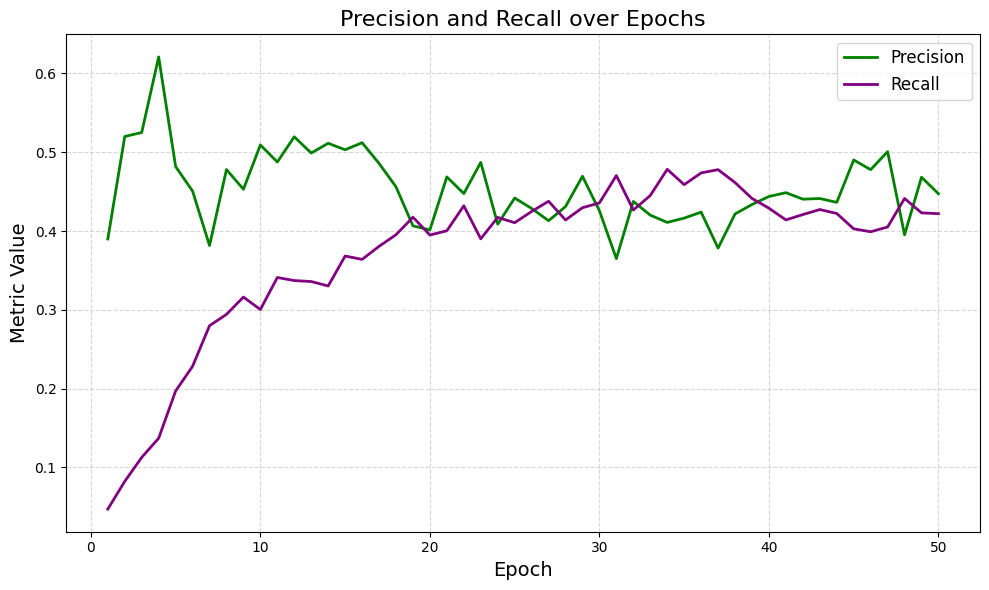

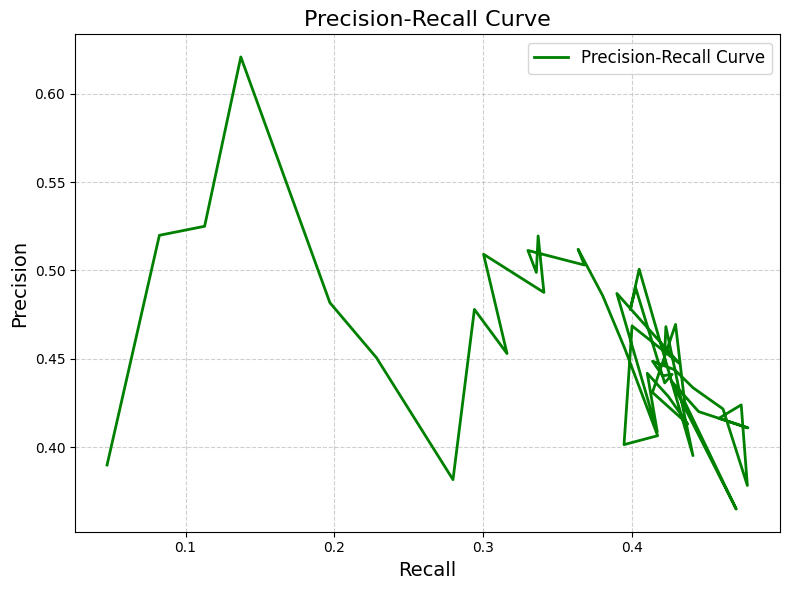

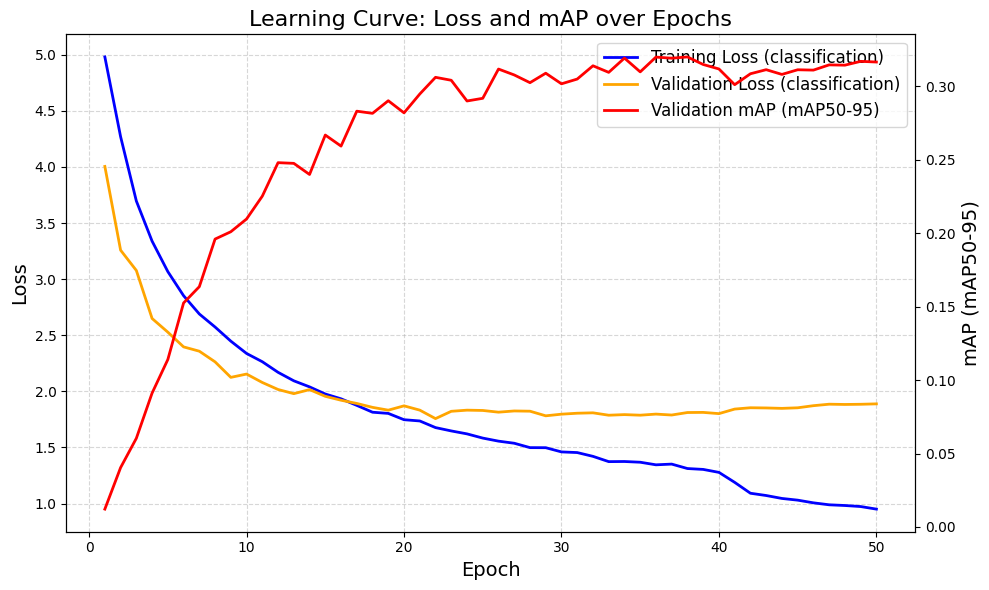

In [0]:
plot_precision_recall(results_df)

plot_precision_recall_curve(results_df)

plot_combined_learning_curve(results_df)

In [0]:
test_results = yolo.val(split="test")

Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)


val: Scanning /tmp/openimage/openimages/test/labels... 1431 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:01<00:00, 975.03it/s] 


val: New cache created: /tmp/openimage/openimages/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:22<00:00,  2.03it/s]


                   all       1431       2591      0.518      0.426      0.438      0.347
               hot dog          8         11      0.552      0.727      0.454      0.415
          french fries         15         17      0.256      0.118      0.194      0.124
                waffle         11         11      0.655       0.52      0.531      0.379
               pancake         12         13      0.336      0.538       0.63      0.491
               burrito          9         12      0.298      0.333      0.333      0.161
               pretzel          9         10      0.478        0.6      0.571      0.513
               popcorn          7          7          1      0.714       0.86      0.764
                cookie         50        204      0.603      0.755      0.664      0.562
                muffin         50         91      0.579       0.67      0.615      0.518
             ice cream         50         72       0.47      0.306       0.32      0.199
                  cak

Testing with augmented data


In [0]:
from ultralytics import YOLO

if not dist.is_initialized():
    dist.init_process_group("nccl")

yolo_augment = YOLO("yolo11n.pt")
result_augment = yolo_augment.train(
    data="data/openimages/data.yaml",
    epochs=50,
    batch=32,
    device=device,
    augment=True,
    project="run/yolo-augmented",
    patience=10,
)
valid_augment_results = yolo_augment.val()
print(valid_augment_results)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)


100%|██████████| 755k/755k [00:00<00:00, 16.5MB/s]


Overriding model.yaml nc=80 with nc=64
Transferred 442/499 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir /tmp/yolo-augmented/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


2024-12-10  16:55:55 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


AMP: checks passed ✅


train: Scanning /tmp/openimage/openimages/train/labels... 10748 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10748/10748 [00:06<00:00, 1620.58it/s]

train: WARNING ⚠️ /tmp/openimage/openimages/train/images/50e2f59fe631ef20.jpg: 1 duplicate labels removed


train: New cache created: /tmp/openimage/openimages/train/labels.cache


val: Scanning /tmp/openimage/openimages/val/labels... 1363 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1363/1363 [00:01<00:00, 1361.87it/s]


val: New cache created: /tmp/openimage/openimages/val/labels.cache


2024-12-10  16:56:12 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


Plotting labels to /tmp/yolo-augmented/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000147, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2024/12/10 16:56:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/10 16:56:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/12/10 16:56:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/12/10 16:56:16 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/12/10 16:56:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2024/12/10 16:56:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.


MLflow: logging run_id(930974f5e2a9416eb09b105c665456d4) to databricks
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /tmp/yolo-augmented/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

       1/50      7.02G      1.347       4.98      1.522         87        640: 100%|██████████| 336/336 [02:03<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


                   all       1363       2542       0.39     0.0472     0.0158     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.12G    

*** WARNING: max output size exceeded, skipping output. ***

       2/50      7.12G      1.181      4.269      1.358         89        640: 100%|██████████| 336/336 [02:01<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.39it/s]


                   all       1363       2542       0.52     0.0824     0.0528     0.0404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       3/50      7.01G      1.147      3.696      1.336        125        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.25it/s]


                   all       1363       2542      0.525      0.113     0.0822     0.0604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.24G    

*** WARNING: max output size exceeded, skipping output. ***

       4/50      7.24G      1.118      3.338      1.314         99        640: 100%|██████████| 336/336 [01:56<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.31it/s]


                   all       1363       2542      0.621      0.137      0.129     0.0911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.08G    

*** WARNING: max output size exceeded, skipping output. ***

       5/50      7.08G      1.077      3.067      1.289         80        640: 100%|██████████| 336/336 [01:55<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.45it/s]


                   all       1363       2542      0.482      0.197      0.156      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.11G    

*** WARNING: max output size exceeded, skipping output. ***

       6/50      7.11G      1.055      2.852      1.269        280        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.21it/s]


                   all       1363       2542      0.451      0.228      0.199      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       7/50      7.01G      1.045      2.689      1.257         76        640: 100%|██████████| 336/336 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]


                   all       1363       2542      0.382       0.28      0.217      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

       8/50      7.01G      1.025      2.573      1.247        122        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]


                   all       1363       2542      0.478      0.294      0.257      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

       9/50      7.03G      1.027      2.447      1.238        110        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.21it/s]


                   all       1363       2542      0.453      0.316      0.265      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.13G    

*** WARNING: max output size exceeded, skipping output. ***

      10/50      7.13G      1.005      2.338       1.23         89        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.509        0.3      0.276       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.95G    

*** WARNING: max output size exceeded, skipping output. ***

      11/50      6.95G     0.9937      2.264      1.224         77        640: 100%|██████████| 336/336 [01:54<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.25it/s]


                   all       1363       2542      0.488      0.341      0.288      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      12/50      7.01G     0.9819       2.17      1.213        216        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]


                   all       1363       2542       0.52      0.337      0.318      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      13/50      7.02G     0.9775      2.094        1.2        186        640: 100%|██████████| 336/336 [01:56<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.50it/s]


                   all       1363       2542      0.499      0.336      0.322      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

      14/50      7.03G     0.9661       2.04        1.2        115        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.57it/s]


                   all       1363       2542      0.511       0.33      0.317       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.98G    

*** WARNING: max output size exceeded, skipping output. ***

      15/50      6.98G     0.9626      1.976      1.197         86        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]


                   all       1363       2542      0.503      0.368      0.344      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         7G    

*** WARNING: max output size exceeded, skipping output. ***

      16/50         7G     0.9604      1.934      1.195         60        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.512      0.364       0.34      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      17/50      6.97G     0.9615      1.875      1.186        109        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.48it/s]


                   all       1363       2542      0.486      0.381      0.368      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      18/50      7.01G     0.9347      1.814      1.178         95        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all       1363       2542      0.456      0.395      0.364      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.09G    

*** WARNING: max output size exceeded, skipping output. ***

      19/50      7.09G     0.9448      1.804      1.185        102        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]


                   all       1363       2542      0.407      0.418      0.374       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      20/50      7.07G     0.9443      1.747      1.174        121        640: 100%|██████████| 336/336 [01:53<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.54it/s]


                   all       1363       2542      0.401      0.395      0.367      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      21/50      7.02G     0.9268      1.736      1.171         95        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]


                   all       1363       2542      0.469        0.4      0.379      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       7.1G    

*** WARNING: max output size exceeded, skipping output. ***

      22/50       7.1G     0.9363      1.677      1.171         84        640: 100%|██████████| 336/336 [01:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.30it/s]


                   all       1363       2542      0.447      0.432      0.393      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.03G    

*** WARNING: max output size exceeded, skipping output. ***

      23/50      7.03G     0.9199      1.647      1.162        108        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]


                   all       1363       2542      0.487       0.39       0.39      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      24/50      7.02G     0.9176      1.621      1.162         93        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.31it/s]


                   all       1363       2542      0.409      0.417      0.375       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.18G    

*** WARNING: max output size exceeded, skipping output. ***

      25/50      7.18G     0.9134      1.584      1.159         93        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all       1363       2542      0.442      0.411       0.38      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.06G    

*** WARNING: max output size exceeded, skipping output. ***

      26/50      7.06G     0.9074      1.556      1.159         68        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]


                   all       1363       2542      0.429      0.425      0.396      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      27/50      7.01G     0.9082      1.538      1.157        119        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]


                   all       1363       2542      0.413      0.438      0.391      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      28/50      7.01G     0.9052      1.499      1.153         92        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.55it/s]


                   all       1363       2542      0.431      0.414      0.385      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.97G    

*** WARNING: max output size exceeded, skipping output. ***

      29/50      6.97G     0.8944      1.498      1.149         90        640: 100%|██████████| 336/336 [01:53<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.36it/s]


                   all       1363       2542      0.469       0.43      0.398      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       7.6G    

*** WARNING: max output size exceeded, skipping output. ***

      30/50       7.6G     0.8908       1.46      1.141         83        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.34it/s]


                   all       1363       2542      0.426      0.436      0.392      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.02G    

*** WARNING: max output size exceeded, skipping output. ***

      31/50      7.02G     0.8952      1.455      1.141        113        640: 100%|██████████| 336/336 [01:55<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.31it/s]


                   all       1363       2542      0.365       0.47      0.389      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.05G    

*** WARNING: max output size exceeded, skipping output. ***

      32/50      7.05G     0.8821      1.421      1.135         91        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.27it/s]


                   all       1363       2542      0.438      0.427      0.398      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.17G    

*** WARNING: max output size exceeded, skipping output. ***

      33/50      7.17G      0.882      1.374      1.134        107        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]


                   all       1363       2542       0.42      0.445      0.397      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      34/50      7.07G     0.8735      1.375      1.132         82        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]


                   all       1363       2542      0.411      0.478      0.408      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.07G    

*** WARNING: max output size exceeded, skipping output. ***

      35/50      7.07G     0.8689      1.369      1.128         67        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]


                   all       1363       2542      0.416      0.459        0.4       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.58G    

*** WARNING: max output size exceeded, skipping output. ***

      36/50      7.58G     0.8756      1.345      1.131        110        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]


                   all       1363       2542      0.424      0.474      0.408       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      37/50      7.01G     0.8744      1.352      1.135        126        640: 100%|██████████| 336/336 [01:53<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.35it/s]


                   all       1363       2542      0.378      0.478      0.404      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.09G    

*** WARNING: max output size exceeded, skipping output. ***

      38/50      7.09G     0.8635      1.312      1.125        107        640: 100%|██████████| 336/336 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]


                   all       1363       2542      0.422      0.461      0.406       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.24G    

*** WARNING: max output size exceeded, skipping output. ***

      39/50      7.24G      0.864      1.305      1.128        102        640: 100%|██████████| 336/336 [03:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.41it/s]


                   all       1363       2542      0.434      0.441      0.402      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      40/50      7.01G     0.8597      1.278      1.121         90        640: 100%|██████████| 336/336 [01:55<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]


                   all       1363       2542      0.444      0.429        0.4      0.312
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      41/50      6.96G      0.823      1.189        1.1         32        640: 100%|██████████| 336/336 [01:54<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/22 [00:00<?, ?it/s]2024-12-10  18:23:43 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/l

                   all       1363       2542      0.449      0.414      0.386      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      42/50      6.96G     0.8017      1.092      1.084         32        640: 100%|██████████| 336/336 [01:53<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.51it/s]


                   all       1363       2542       0.44      0.421      0.396      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.99G    

*** WARNING: max output size exceeded, skipping output. ***

      43/50      6.99G     0.7968      1.072      1.081         61        640: 100%|██████████| 336/336 [01:54<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.38it/s]


                   all       1363       2542      0.441      0.427      0.399      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.96G    

*** WARNING: max output size exceeded, skipping output. ***

      44/50      6.96G      0.789      1.046      1.077         79        640: 100%|██████████| 336/336 [01:55<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.27it/s]


                   all       1363       2542      0.436      0.422      0.398      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.01G    

*** WARNING: max output size exceeded, skipping output. ***

      45/50      7.02G     0.7868      1.031      1.072         57        640: 100%|██████████| 336/336 [01:51<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]


                   all       1363       2542       0.49      0.403      0.401      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.97G    

*** WARNING: max output size exceeded, skipping output. ***

      46/50      6.97G     0.7786      1.007      1.065         41        640: 100%|██████████| 336/336 [01:52<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.38it/s]


                   all       1363       2542      0.478      0.399      0.399      0.311
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 36, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

46 epochs completed in 1.634 hours.
Optimizer stripped from /tmp/yolo-augmented/train/weights/last.pt, 5.5MB
Optimizer stripped from /tmp/yolo-augmented/train/weights/best.pt, 5.5MB

Validating /tmp/yolo-augmented/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)
YOLO11n summary (fused): 238 layers, 2,609,800 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.10it/s]


                   all       1363       2542      0.507      0.412      0.413      0.323
               hot dog          7          7      0.501      0.571      0.662      0.635
          french fries         14         24      0.529      0.235      0.195      0.139
                waffle          9         10      0.509        0.6      0.521      0.471
               pancake         11         13      0.175      0.308      0.219      0.141
               burrito          8         11      0.438      0.427      0.388      0.275
               pretzel          8          8      0.595      0.556       0.63      0.559
               popcorn          5          5          1      0.994      0.995      0.941
                cookie         50        220       0.56      0.684      0.678       0.54
                muffin         50        105      0.425      0.438      0.353      0.295
             ice cream         50         73      0.533      0.329      0.367      0.215
                  cak

Uploading artifacts:   0%|          | 0/2 [00:00<?, ?it/s]

2024/12/10 18:34:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run train at: e2-demo-field-eng.cloud.databricks.com/ml/experiments/3280716146281655/runs/930974f5e2a9416eb09b105c665456d4.
2024/12/10 18:34:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: e2-demo-field-eng.cloud.databricks.com/ml/experiments/3280716146281655.


MLflow: results logged to databricks
MLflow: disable with 'yolo settings mlflow=False'
Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)
YOLO11n summary (fused): 238 layers, 2,609,800 parameters, 0 gradients, 7.4 GFLOPs


val: Scanning /tmp/openimage/openimages/val/labels.cache... 1363 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1363/1363 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:23<00:00,  1.80it/s]


                   all       1363       2542      0.495      0.416      0.413      0.322
               hot dog          7          7      0.448       0.58      0.662      0.635
          french fries         14         24      0.495      0.204      0.193      0.135
                waffle          9         10      0.499        0.6      0.536      0.476
               pancake         11         13      0.174      0.323      0.222      0.144
               burrito          8         11      0.437      0.455      0.393      0.279
               pretzel          8          8      0.525        0.5      0.561      0.514
               popcorn          5          5      0.952          1      0.995      0.893
                cookie         50        220      0.565        0.7       0.68      0.546
                muffin         50        105      0.427      0.438      0.357      0.299
             ice cream         50         73      0.525      0.329      0.371      0.215
                  cak

2024-12-10  18:35:23 INFO Exception while sending command.
Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 528, in send_command
    self.socket.sendall(command.encode("utf-8"))
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 531, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending


In [0]:
import pandas as pd

# Load the CSV file into a DataFrame
results_augment_csv_file = str(result.save_dir) + "/results.csv"
results_augment_df = pd.read_csv(results_augment_csv_file)

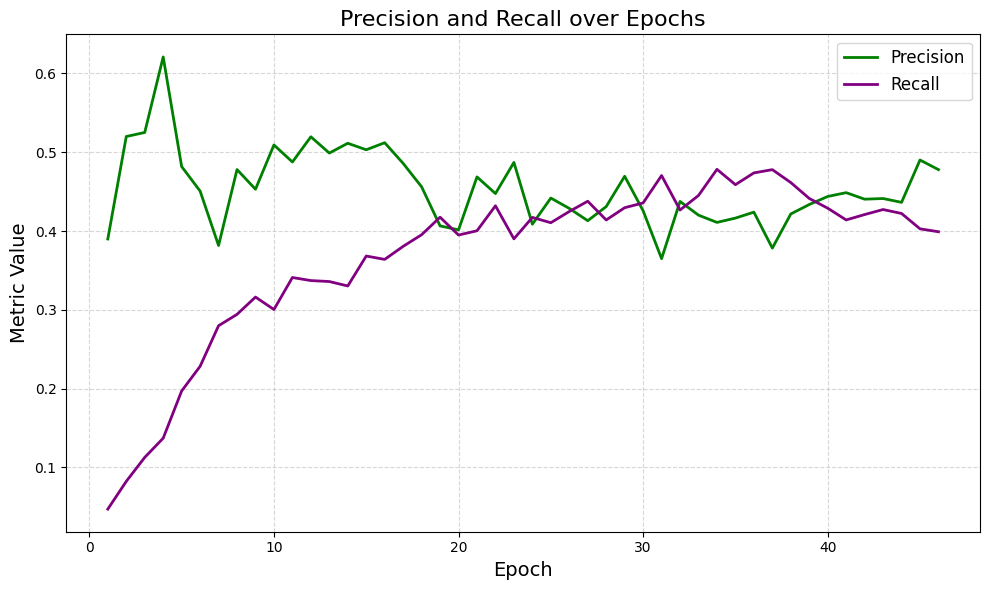

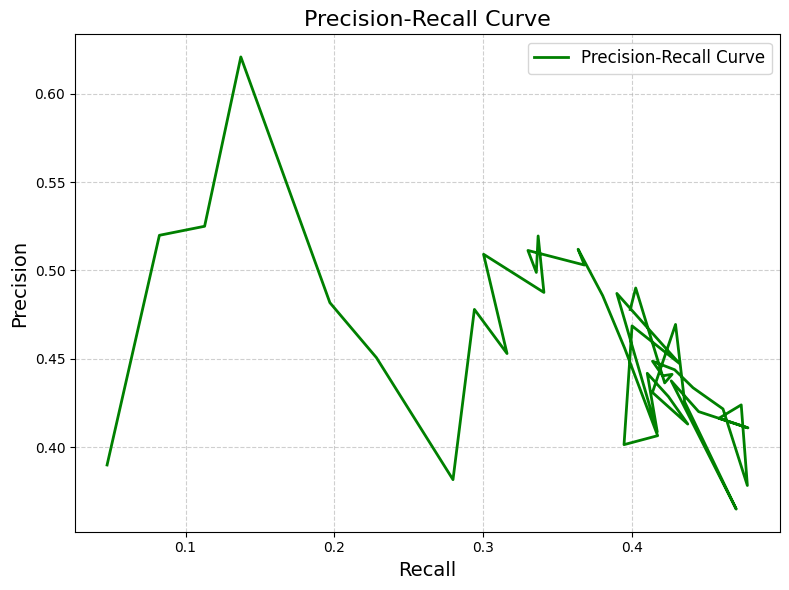

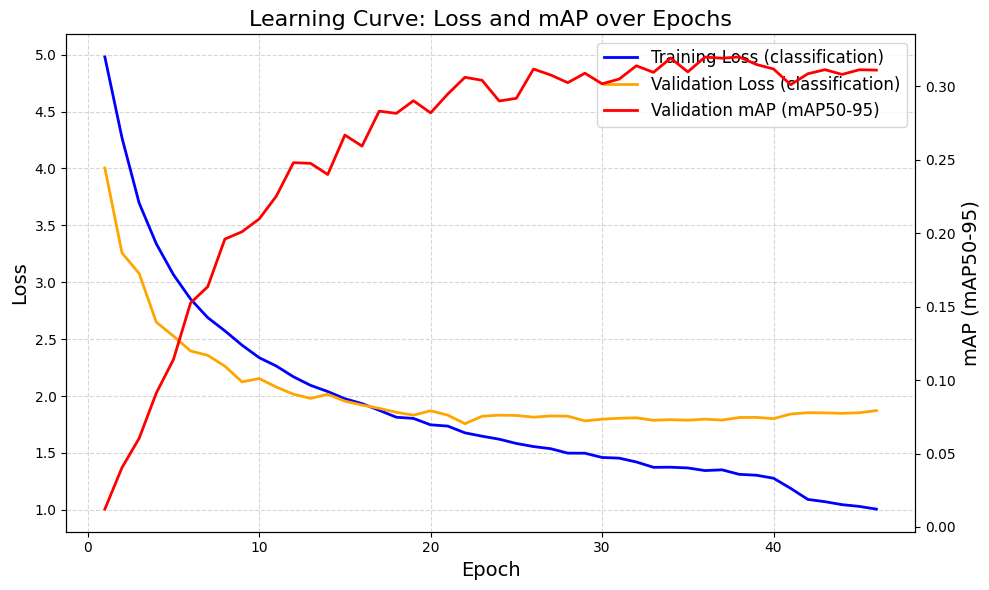

In [0]:
plot_precision_recall(results_augment_df)

plot_precision_recall_curve(results_augment_df)

plot_combined_learning_curve(results_augment_df)

In [0]:
test_augment_results = yolo_augment.val(split="test")

Ultralytics 8.3.48 🚀 Python-3.11.0rc1 torch-2.3.1+cu121 CUDA:0 (NVIDIA A10G, 22516MiB)


val: Scanning /tmp/openimage/openimages/test/labels... 1431 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:01<00:00, 955.43it/s]


val: New cache created: /tmp/openimage/openimages/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:25<00:00,  1.79it/s]


                   all       1431       2591      0.522      0.426      0.438      0.351
               hot dog          8         11      0.469      0.455      0.361       0.35
          french fries         15         17      0.332      0.117      0.118     0.0831
                waffle         11         11      0.471      0.455      0.372      0.326
               pancake         12         13      0.519      0.615       0.62      0.479
               burrito          9         12      0.355        0.5      0.376       0.25
               pretzel          9         10      0.413        0.5      0.423      0.383
               popcorn          7          7      0.767      0.714      0.832      0.765
                cookie         50        204      0.548      0.725      0.661      0.557
                muffin         50         91      0.543      0.626      0.578       0.47
             ice cream         50         72      0.448      0.375      0.374      0.223
                  cak